In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [6]:
img = image.load_img("D:/masters/Emden/analytics/custom_dataset/chio/chio2.PNG")

In [7]:
plt.show(img)

In [8]:
for i,j,k in os.walk("D:/masters/Emden/analytics/custom_dataset/chio",topdown=True):
  print(i)
  print(j)
  print(k)

D:/masters/Emden/analytics/custom_dataset/chio
[]
['Chio1.png', 'chio10.PNG', 'chio2.png', 'chio4.PNG', 'chio5.PNG', 'chio6.PNG', 'chio7.PNG', 'chio8.PNG', 'chio9.PNG']


In [11]:
cv2.imread(os.path.join("D:/masters/Emden/analytics/custom_dataset/chio","chio2.png")).shape

(161, 312, 3)

In [12]:
train = ImageDataGenerator(rescale=1/255) 
validation = ImageDataGenerator(rescale=1/255)

In [14]:
train_dataset = train.flow_from_directory("D:/masters/Emden/analytics/custom_dataset"
                                         ,target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary'
                                         )
validation_dataset = train.flow_from_directory("D:/masters/Emden/analytics/custom_dataset"
                                         ,target_size=(200,200),
                                          batch_size=3,
                                          class_mode='binary'
                                         )

Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [15]:
train_dataset.class_indices 

{'chio': 0, 'pringles': 1}

In [16]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(200,200,3))
                                   ,tf.keras.layers.MaxPool2D(2,2),
                                   #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation="sigmoid")
                                   ])

In [21]:
from tensorflow.keras.optimizers.experimental import RMSprop

In [22]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy']
             )

In [23]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch=3,
                     epochs=10,
                     validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 2s 619ms/step - loss: 6.2830 - accuracy: 0.5556 - val_loss: 0.6050 - val_accuracy: 0.6875
Epoch 2/10
3/3 [==============================] - 1s 437ms/step - loss: 0.6726 - accuracy: 0.7778 - val_loss: 0.8555 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 429ms/step - loss: 0.5183 - accuracy: 0.8571 - val_loss: 1.5202 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 1s 433ms/step - loss: 1.2390 - accuracy: 0.6667 - val_loss: 0.5634 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 1s 422ms/step - loss: 0.7408 - accuracy: 0.6667 - val_loss: 0.4649 - val_accuracy: 0.6250
Epoch 6/10
3/3 [==============================] - 1s 438ms/step - loss: 0.4853 - accuracy: 0.6667 - val_loss: 0.1939 - val_accuracy: 0.9375
Epoch 7/10
3/3 [==============================] - 1s 391ms/step - loss: 0.2800 - accuracy: 0.8571 - val_loss: 0.1558 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

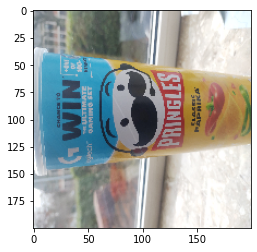

1/1 [==============================] - 0s 29ms/step
pringles


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\masters\\Emden\\analytics\\custom_dataset//Chio1.png'

In [42]:
dir_path = "D:\\masters\\Emden\\analytics\\custom_dataset"
for i,j,k in os.walk(dir_path,topdown=True):
    #print(k[0])
    img = image.load_img(dir_path+'//'+k[0],target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis =0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("chio")
    else:
        print("pringles")

In [43]:
for i,j,k in os.walk(dir_path,topdown=True):
    print(k)

['testing_image.jpg', 'testing_image2.png']
['Chio1.png', 'chio10.PNG', 'chio2.png', 'chio4.PNG', 'chio5.PNG', 'chio6.PNG', 'chio7.PNG', 'chio8.PNG', 'chio9.PNG']
['pringles1.jpg', 'pringles2.jpg', 'pringles3.jpg', 'pringles4.jpg', 'pringles5.jpg', 'pringles6.jpg', 'pringles7.jpg']


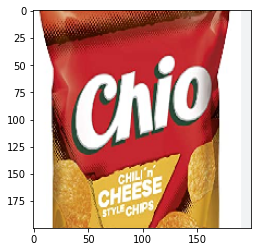

1/1 [==============================] - 0s 29ms/step
chio


In [46]:
img = image.load_img("D:\\masters\\Emden\\analytics\\custom_dataset\\testing_image2.png",target_size=(200,200))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x,axis =0)
images = np.vstack([x])
val = model.predict(images)
if val == 0:
    print("chio")
else:
    print("pringles")

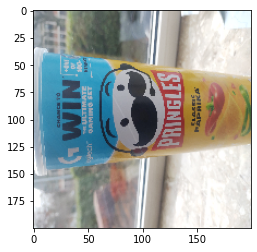

1/1 [==============================] - 0s 30ms/step
pringles


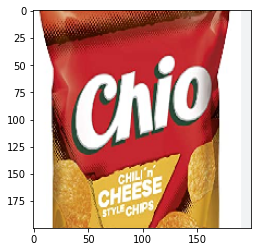

1/1 [==============================] - 0s 28ms/step
chio


In [48]:
dir_path = "D:\\masters\\Emden\\analytics\\custom_dataset\\testing"
for i in os.listdir(dir_path):
    #print(k[0])
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis =0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("chio")
    else:
        print("pringles")